# Feed Forward Neural Network

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt

`device`를 설정합니다. 만약 여러분의 서버 환경에 GPU가 있다면 CUDA로, 없다면 CPU로 연산할 것 입니다.

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

우리는 우리는 학습 데이터로 MNIST를 사용할 것 입니다. MNIST 데이터는 28x28 사이즈의 흑백 이미지입니다. MNIST 데이터셋은 0~9까지의 숫자 데이터셋이므로 총 10개중 하나로 분류하는 분류 문제입니다. batch_size는 2의 배수로 지정하는 것이 좋습니다. 일반적으로 64, 128, 256, 512중 하나의 값으로 지정하는 것이 일반적입니다. 만약 여러분의 컴퓨터의 메모리가 작다면 batch_size를 작게 설정해보세요.

In [3]:
input_size = 28*28
nb_classes = 10
epochs = 5
batch_size = 124
learning_rate = 0.001

아래 코드는 mnsit로 데이터셋을 만드는 작업입니다. `root` 매개변수는 데이터셋을 저장할 위치를 지정합니다. `transform` 매개변수는 데이터셋을 변환하는 매개변수입니다. 나중에 자세히 알아보겠지만 일단 `T.ToTensor()`로 데이터셋의 이미지를 Tensor로 변환하였습니다.

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./MNIST',
                                          train=True,
                                          transform=T.ToTensor(),
                                          download=True)
test_dataset = torchvision.datasets.MNIST(root='./MNIST',
                                         train=False,
                                         transform=T.ToTensor())

Dataloader를 만듭니다. dataloader를 하면 이후 학습 부분에서 input을 편하게 넣을 수 있습니다.

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

모델을 만듭니다. nn.Module 클래스를 상속받아 만듭니다.

In [6]:
class Model(nn.Module):
    def __init__(self, input_size, nb_classes):
        super(Model, self).__init__() # 상속박은 nn.Module의 초기화 메서드를 호출하는 부분입니다. 꼭 진행해주어야 합니다.
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, nb_classes)
        
    def forward(self, x): # forward 함수는 nn.Module에서 강제하는 메서드입니다. 꼭 구현해야하며 x는 모델에 들어갈 데이터입니다. 
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        
        return out # __init__에서 구현한 여러 층을 거쳐 결과값을 반환합니다.

모델 인스턴스를 생성합니다.

In [7]:
model = Model(input_size, nb_classes).to(device)

In [8]:
cost_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

몇개의 batch가 있는지 구합니다. 이 값은 (전체 데이터수) / (batch_size) 입니다.

In [9]:
total_step = len(train_loader)

In [10]:
loss_val = []
for epoch in range(epochs):
    for idx, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = cost_function(outputs, labels)
        loss_val.append(loss)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if not (idx+1) % 100:
            print("Epoch[{}/{}], Batch[{}/{}], Loss={}".format(epoch+1, epochs, idx+1, total_step, loss.item()))

Epoch[1/5], Batch[100/484], Loss=0.3853466212749481
Epoch[1/5], Batch[200/484], Loss=0.27694278955459595
Epoch[1/5], Batch[300/484], Loss=0.3417561948299408
Epoch[1/5], Batch[400/484], Loss=0.18125943839550018
Epoch[2/5], Batch[100/484], Loss=0.16283142566680908
Epoch[2/5], Batch[200/484], Loss=0.1752534806728363
Epoch[2/5], Batch[300/484], Loss=0.11650125682353973
Epoch[2/5], Batch[400/484], Loss=0.11961665004491806
Epoch[3/5], Batch[100/484], Loss=0.0834389477968216
Epoch[3/5], Batch[200/484], Loss=0.08152785897254944
Epoch[3/5], Batch[300/484], Loss=0.06791102141141891
Epoch[3/5], Batch[400/484], Loss=0.07259895652532578
Epoch[4/5], Batch[100/484], Loss=0.09527810662984848
Epoch[4/5], Batch[200/484], Loss=0.04158749431371689
Epoch[4/5], Batch[300/484], Loss=0.13448409736156464
Epoch[4/5], Batch[400/484], Loss=0.059041544795036316
Epoch[5/5], Batch[100/484], Loss=0.051866501569747925
Epoch[5/5], Batch[200/484], Loss=0.028343258425593376
Epoch[5/5], Batch[300/484], Loss=0.060825180262

step에 따른 loss 그래프입니다.

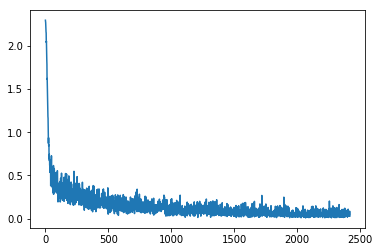

In [11]:
plt.plot(loss_val)
plt.show()

Test 데이터셋의 정확도를 출력합니다. 학습이 필요 없는 부분이기 때문에 Backpropagation이 필요 없고 그렇게 때문에 기울기를 구할 필요가 없습니다. 그렇기에 `with torch.no_grad()` 블록 내부에서 연산을 수행하였습니다.

In [12]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print("Accuracy: {}".format(100*correct / total))

Accuracy: 97.32
